# Проект: классификация

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

Данные о клиентах банка:

age (возраст);
job (сфера занятости);
marital (семейное положение);
education (уровень образования);
default (имеется ли просроченный кредит);
housing (имеется ли кредит на жильё);
loan (имеется ли кредит на личные нужды);
balance (баланс).
Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

contact (тип контакта с клиентом);
month (месяц, в котором был последний контакт);
day (день, в который был последний контакт);
duration (продолжительность контакта в секундах).
Прочие признаки:

campaign (количество контактов с этим клиентом в течение текущей кампании);
pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
previous (количество контактов до текущей кампании)
poutcome (результат прошлой маркетинговой кампании).
И, разумеется, наша целевая переменная deposit, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.

In [7]:
df = pd.read_csv('bank_fin.csv', sep = ';')

In [8]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


Пропуски в признаке balance , пропущено 25 значений

In [9]:
df.describe()

,age,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Задание 2

In [10]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

unknown - обозначение пропущенных значений в признаке job

### Задание 3

In [11]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df['balance'].str.replace(' ','',regex = True)
df['balance'] = df['balance'].str.replace('$','',regex = True)
df['balance'] = df['balance'].str.replace(',','.',regex = True)
df['balance'] = df['balance'].astype(float)

### Задание 4

In [12]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df['balance'] = df['balance'].fillna(df['balance'].median())

до заполнения

In [13]:
df['balance'].mean()


1526.9360329690019

после заполнения

In [14]:
df['balance'].mean()

1526.9360329690019

### Задание 5

In [15]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
df['job'] = df['job'].fillna(df['job'].mode())

In [16]:
df['education'] = df['education'].fillna(df['education'].mode())

После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-разделителя.

In [17]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [18]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [19]:
balance_mean = df[(df['job']== 'management') & (df['education'] == 'secondary')]['balance'].mean()

In [20]:
round(balance_mean,3)

1353.613

In [21]:
df.loc[df.job == 'unknown', 'job'] = 'management'
df.loc[df.education == 'unknown', 'education'] = 'secondary'
df[(df.job == 'management')&(df.education == 'secondary')]['balance'].mean()

1598.8829787234042

### Задание 6

In [22]:
# удалите все выбросы для признака balance
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    print(lower_bound)
    print(upper_bound)
    return outliers, cleaned

In [23]:
outliers, cleaned = outliers_iqr(df, 'balance')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

-2241.0
4063.0
Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10104


In [24]:
df = cleaned.copy()

## Часть 2:  Разведывательный анализ

### Задание 1

вычислите частоты для открывших депозит и для тех, кто его не открыл

In [25]:
df['deposit'].value_counts()

no     5423
yes    4681
Name: deposit, dtype: int64

In [26]:
y = list(df['deposit'].value_counts())
x = ['no','yes']

<AxesSubplot:>

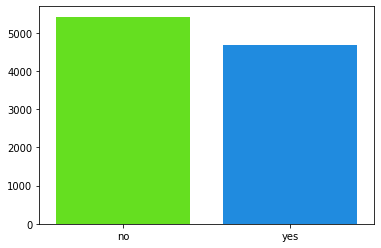

In [27]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
sns.barplot(x = x , y = y,palette="gist_rainbow")


### Задание 2

Начнём с описательных статистик для количественных переменных.

Рассчитайте их и продумайте подробную интерпретацию.
Попробуйте описать данные, которые у вас есть, увидеть первые зависимости.
Рассмотрите минимальные и максимальные значения.
Посмотрите на меры разброса и оцените, насколько данные вариативны.
Сравнив меры центральной тенденции, сделайте выводы о том, есть ли аномальные значения с меньшей или большей стороны.
Дополните выводы визуализациями. Вспомните, какие диаграммы могут помочь в иллюстрации распределений количественных данных.

In [28]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код

In [29]:
df.describe(include= object)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10104,10104,10104,10104,10104,10104,10104,10104,10104,10104
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2314,5714,5517,9938,5243,8711,7282,2616,7570,5423


In [30]:
#!pip install seaborn

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.__version__

'0.11.2'

In [32]:
col_num = [col for col in df.columns.tolist() if df[col].dtype not in ['object']]

In [33]:

sns.__version__

'0.11.2'

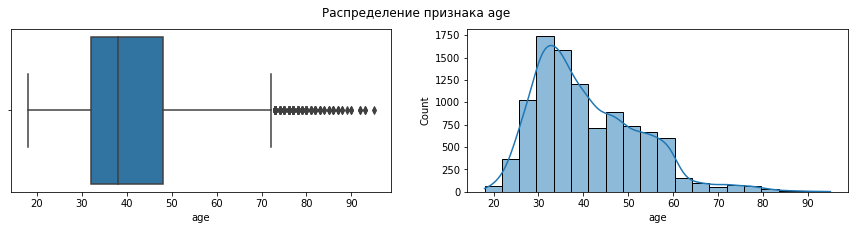

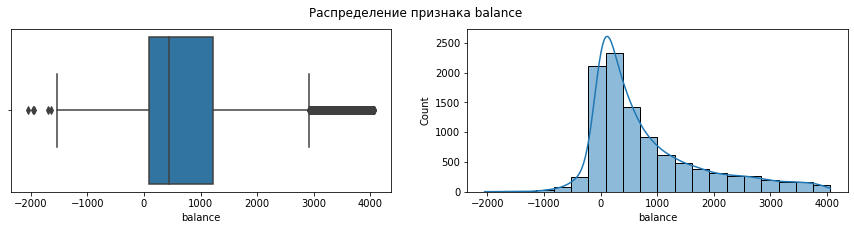

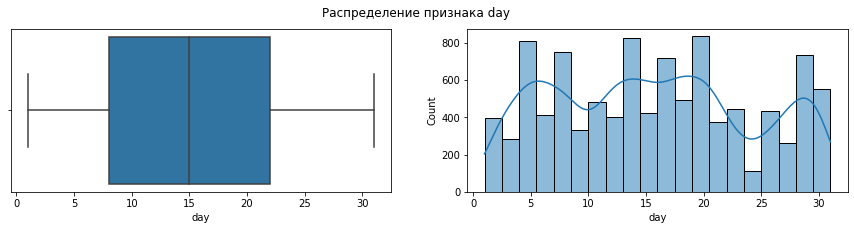

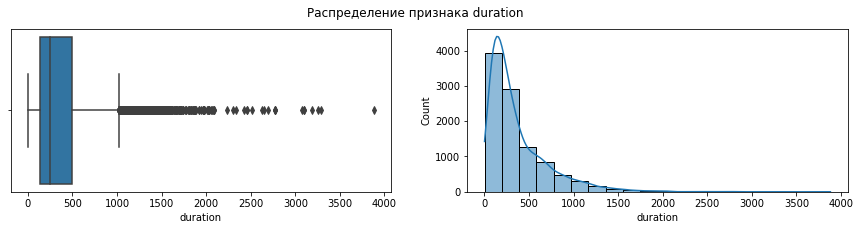

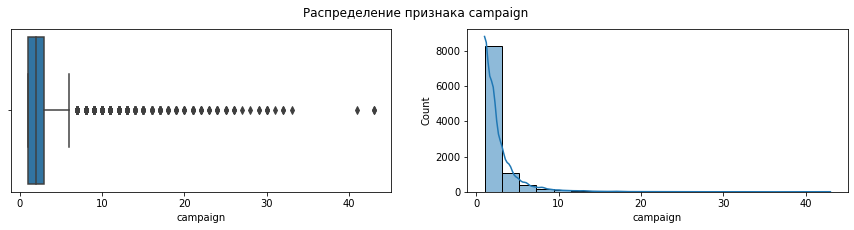

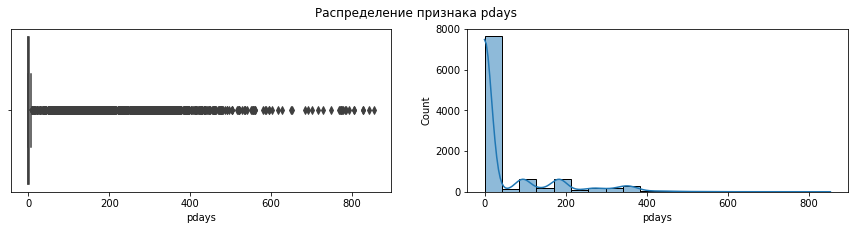

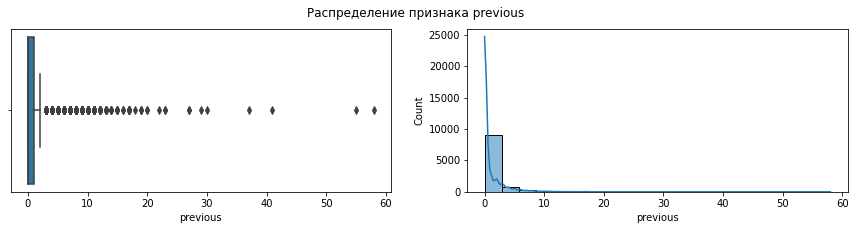

In [34]:
for col in col_num:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
    fig.suptitle(f'Распределение признака {col}')
    boxplot = sns.boxplot(
        data=df,
        x=col,
        orient='h',
        width=0.9,
        ax=ax[0]
    )
    sns.histplot(
        data=df,
        x=col,
        bins=20,
        kde=True,
    );

Анализ
age - распределен нормально, большая часть клиентов от 32 до 48 лет.
balance - основные клиенты с депозитом до 1000$
duration (продолжительность контакта в секундах) - есть кнтакты менее 5 сек, которые говорят, что клиент не стал слушать предложения банка
campaign (количество контактов с этим клиентом в течение текущей кампании) - 75 квантиль = 3 контактом что является адекватным числом контактов с одним клиентом за период компаниие, все что больше можно рассматривать как анамалии или неадекватность выстраивание компании.
pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании) - есть клиенты с которыми не было не одного контакта в течение года
previous (количество контактов до текущей кампании) - присутствие явных аномалий более 10 контактов необходимо смотреть

**Исследование возраста клиентов**

In [35]:
visual_age =  pd.DataFrame(df['age'].value_counts())

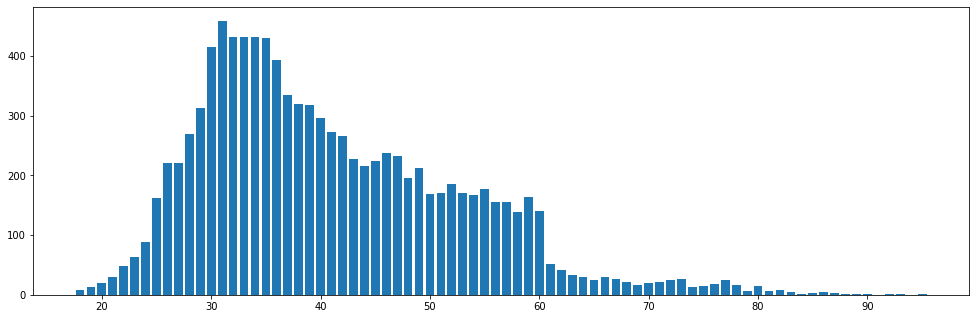

In [36]:
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(
    x = visual_age.index,
    height = visual_age['age'],
    );

In [37]:
visual_age.index.max()

95

In [38]:
visual_age.index.min()

18

Максимальный возраст клиента банка равен 95 лет, минимальный возраст -18 лет.  Мода 31-36 лет

**Исследование продолжительности разговора**

Какова минимальная продолжительность разговора с клиентом банка? Ответ дайте в количестве секунд.

In [39]:
min=df['duration'].min()

максимальная продолжительность разговора

In [40]:
max = df['duration'].max()

средняя проолжительность разговора

In [41]:
mean = round(df['duration'].mean(),0)

In [42]:
x = list(['max','mean','min'])

In [43]:
y = list([max,mean,min])

<AxesSubplot:>

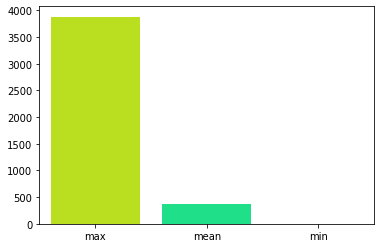

In [44]:
sns.barplot( x=x,y=y, palette="gist_rainbow")

**Исследование баланса**

In [45]:
max = df['balance'].max()
mean = df['balance'].mean()
min = df['balance'].min()

<AxesSubplot:>

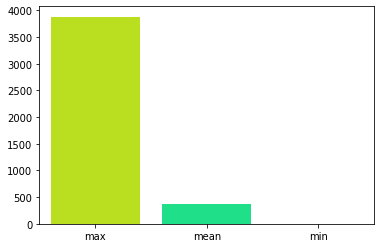

In [46]:
sns.barplot( x=x,y=y, palette="gist_rainbow")

Из визуализации баланса видно,что баланс не ограничен нулем, отрицательный баланс говорит о задолженности клиента перед банком. Максимальная задолженность составляет 2049 ($)

Какой процент всех клиентов банка является должником?

In [47]:
from itertools import count

In [48]:
debtor = df[df['balance'] <0]['age'].count()
debtor_percent = (debtor/len(df.age))*100

<AxesSubplot:>

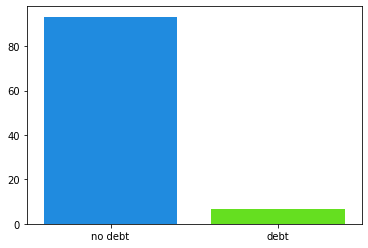

In [49]:
x = (['no debt','debt'])
y = ([(100-debtor_percent),debtor_percent])
sns.barplot( x=x,y=y, palette="gist_rainbow_r")

Почти 7 % клиентов банка являются должниками, однако, результат визуализации выглядит приемлемым (необходимо знать точно,что считается приемлеммым в данном банке)

### Задание 3

In [50]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат


In [51]:
col_cat = [col for col in df.columns.tolist() if df[col].dtype in ['object']]
df[col_cat].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10104,10104,10104,10104,10104,10104,10104,10104,10104,10104
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2314,5714,5517,9938,5243,8711,7282,2616,7570,5423


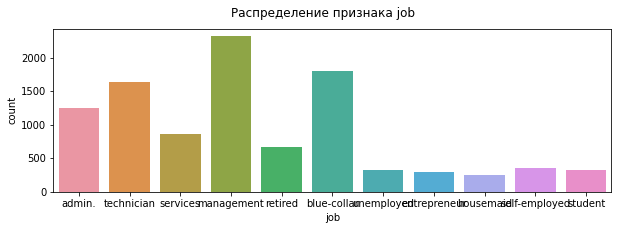

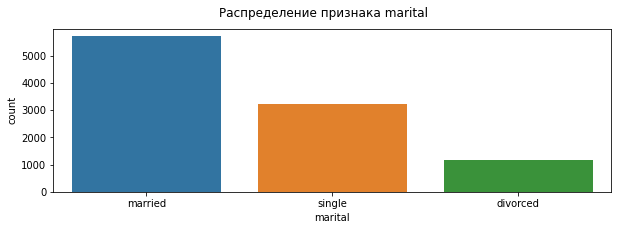

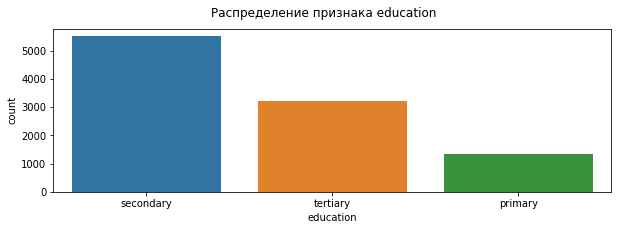

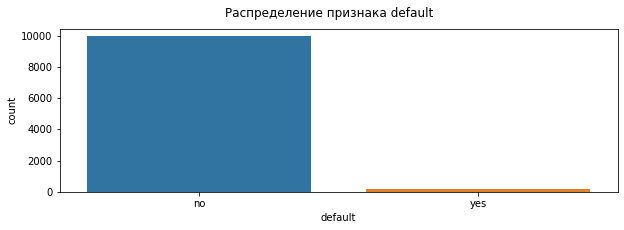

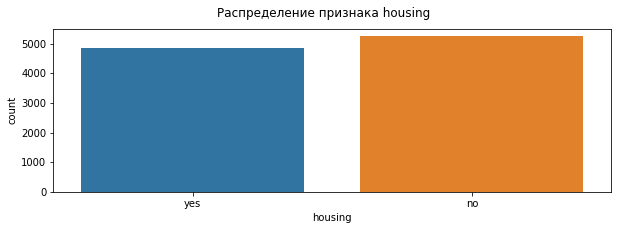

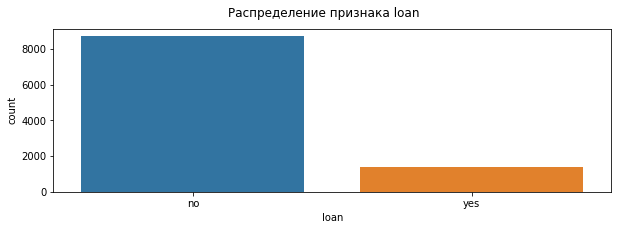

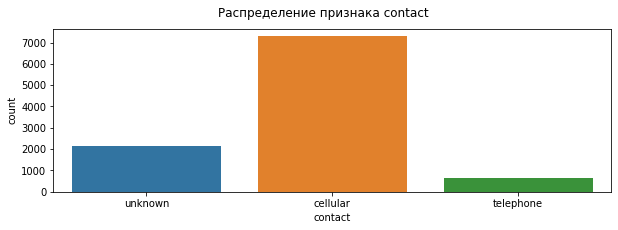

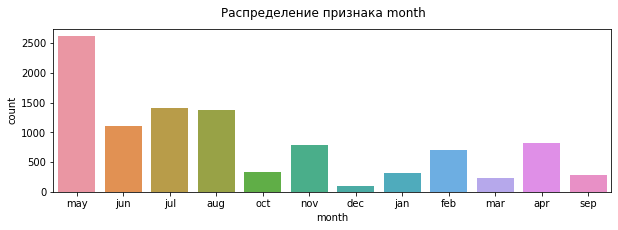

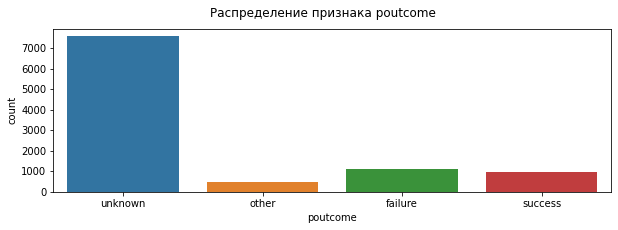

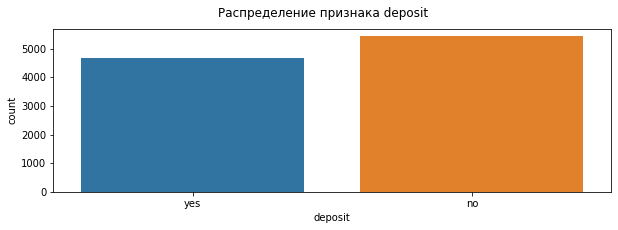

In [52]:
for col in col_cat:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
    fig.suptitle(f'Распределение признака {col}')
    # display(df[col].value_counts())
    sns.countplot(data=df, x=col);

### Задание 4

<AxesSubplot:xlabel='poutcome'>

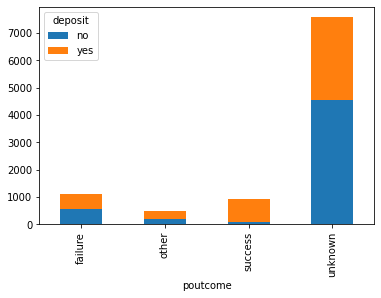

In [53]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
types = df.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

### Задание 5

<AxesSubplot:xlabel='month'>

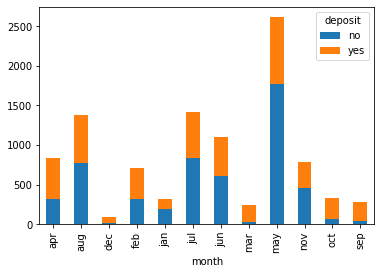

In [54]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
types = df.groupby('month')['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

или так

In [55]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
months = df.groupby("month")['deposit'].value_counts(
    normalize=False).unstack().reset_index().rename(columns={'no': 'no_deposit',
                                                              'yes': 'yes_deposit',
                                                             })
months['failure'] = round(months['no_deposit'] / (months['no_deposit'] + months['yes_deposit']), 2)

In [56]:
months

deposit,month,no_deposit,yes_deposit,failure
0,apr,317,513,0.38
1,aug,775,610,0.56
2,dec,9,84,0.10
3,feb,323,386,0.46
4,jan,194,125,0.61
5,jul,836,582,0.59
6,jun,606,498,0.55
7,mar,24,213,0.10
8,may,1775,841,0.68
9,nov,456,324,0.58


### Задание 6

In [57]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

In [58]:
def get_age_group(arg):
    if arg < 30:
        return '<30'
    elif 30 <= arg < 40:
        return '30-39'
    elif 40 <= arg < 50:
        return '40-49'
    elif 50 <= arg < 60:
        return '50-59'
    else:
        return '60+'

In [59]:
df['age_group'] = df['age'].apply(get_age_group)

Text(0.5, 0.98, 'Распределение открытия депозита по возрастам')

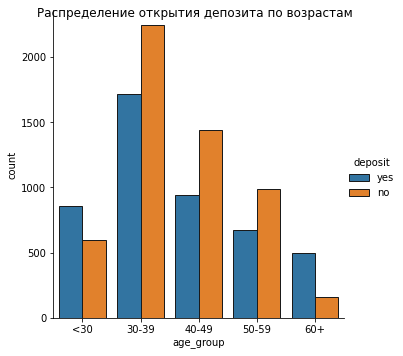

In [60]:
catplot = sns.catplot(
    x="age_group", 
    hue="deposit", 
    kind="count",
    edgecolor=".1", 
    order=['<30', '30-39', '40-49', '50-59', '60+'],
    data=df
)
catplot.fig.suptitle('Распределение открытия депозита по возрастам')

### Задание 7

In [61]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса

Text(0.5, 0.98, 'Распределение открытия депозита по семейному статусу')

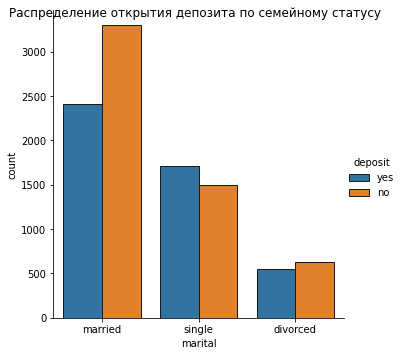

In [62]:

catplot = sns.catplot(
    x="marital", 
    hue="deposit", 
    kind="count",
    edgecolor=".1", 
    data=df
)
catplot.fig.suptitle('Распределение открытия депозита по семейному статусу')

Text(0.5, 0.98, 'Распределение открытия депозита по возрастам')

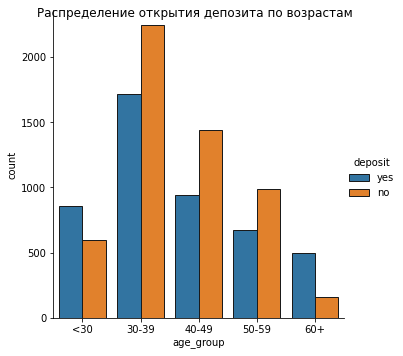

In [63]:
catplot = sns.catplot(
    x="age_group", 
    hue="deposit", 
    kind="count",
    edgecolor=".1", 
    order=['<30', '30-39', '40-49', '50-59', '60+'],
    data=df
)
catplot.fig.suptitle('Распределение открытия депозита по возрастам')

In [64]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования

Text(0.5, 0.98, 'Распределение открытия депозита по образованию')

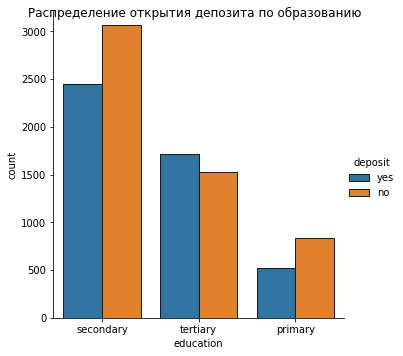

In [65]:
catplot = sns.catplot(
    x="education", 
    hue="deposit", 
    kind="count",
    edgecolor=".1", 
    data=df
)
catplot.fig.suptitle('Распределение открытия депозита по образованию')

In [66]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

In [67]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'age_group'],
      dtype='object')

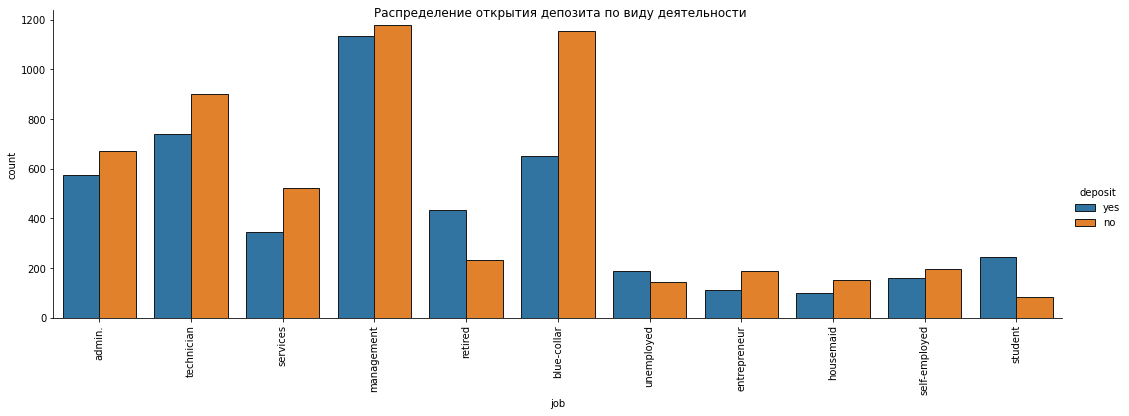

In [68]:
catplot = sns.catplot(
    x="job", 
    hue="deposit", 
    kind="count",
    edgecolor=".1",height=5,
    aspect=3, 
    data=df
)
catplot.fig.suptitle('Распределение открытия депозита по виду деятельности')

catplot.set_xticklabels(rotation=90)

### Задание 8

In [69]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
deposit_yes = df[df['deposit'] == 'yes']

In [70]:
deposit_yes.groupby(['education','marital'])['deposit'].value_counts(
    normalize=False).unstack().reset_index()

deposit,education,marital,yes
0,primary,divorced,96
1,primary,married,339
2,primary,single,82
3,secondary,divorced,283
4,secondary,married,1289
5,secondary,single,879
6,tertiary,divorced,174
7,tertiary,married,784
8,tertiary,single,755


## Часть 3: преобразование данных

### Задание 1

In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['education'])
df['education'] = le.transform(df['education'])

In [72]:
sum(df['education'])

11993

In [73]:
le.fit(df['age_group'])
df['age_group_cod'] = le.transform(df['age_group'])

### Задание 2

In [74]:
# преобразуйте бинарные переменные в представление из нулей и единиц
lb = preprocessing.LabelBinarizer()
lb.fit(df['deposit'])
df['deposit'] = lb.transform(df['deposit'])

In [75]:
round(df['deposit'].std(), 3)

0.499

### Задание 3

In [76]:
# создайте дамми-переменные
lb.fit(df['default'])
df['default_cod'] = lb.transform(df['default'])

lb.fit(df['housing'])
df['housing_cod'] = lb.transform(df['housing'])

lb.fit(df['loan'])
df['loan_cod'] = lb.transform(df['loan'])

Вычислите среднее арифметическое для каждой из получившихся переменных, сложите три результата и в качестве ответа впишите итог, округлив его до трёх знаков после точки-разделителя.

In [77]:
round((df['default_cod'].mean()+df['housing_cod'].mean()+df['loan_cod'].mean()),3)

0.635

In [78]:

df = pd.get_dummies(
    df, 
    columns=['job', 'marital', 'month', 'poutcome'], 
    prefix_sep="_"
)

In [79]:
df = pd.get_dummies(
    df, 
    columns=['contact'], 
    prefix_sep="_")

In [80]:
len(df.columns)

50

### Задание 4

<AxesSubplot:>

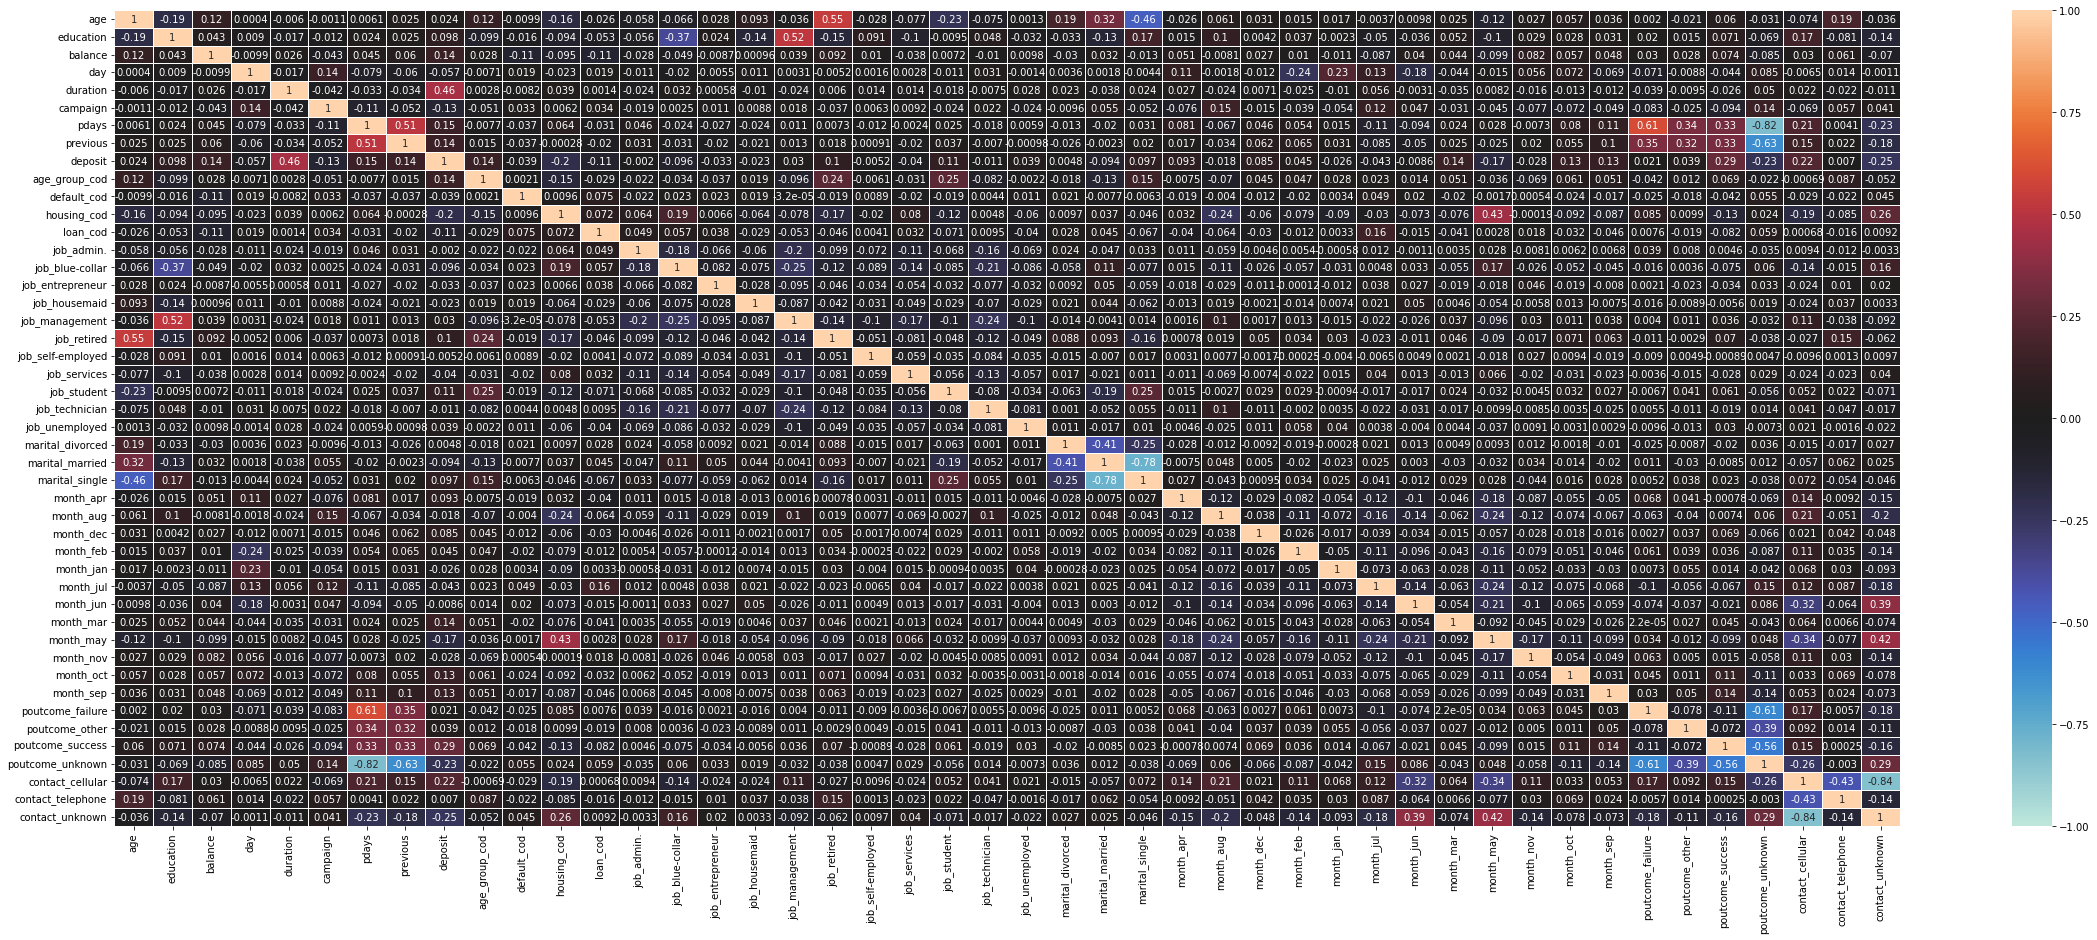

In [81]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

plt.figure(figsize = (40,15))
sns.heatmap(df.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0, linewidths=.5)

### Задание 5

In [82]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [83]:
X_test.shape

(3335, 49)

In [84]:
y_test.mean()

0.46326836581709147

### Задание 6

In [85]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

In [86]:
X_train.drop(['education', 'default', 'housing', 'loan', 'age_group'], axis=1, inplace=True)
X_train.shape

(6769, 44)

In [87]:
X_test.drop(['education', 'default', 'housing', 'loan', 'age_group'], axis=1, inplace=True)

In [88]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
selector = SelectKBest(f_classif, k=15)
X_new = selector.fit_transform(X_train, y_train)
X_train.columns[selector.get_support(indices=True)]
columns_list = X_train.columns[selector.get_support(indices=True)].tolist()
X_new = pd.DataFrame(X_new, columns=columns_list)

### Задание 7

In [89]:
# нормализуйте данные с помощью minmaxsxaler
mm_scaler = preprocessing.MinMaxScaler()
col_names_train = list(X_train.columns)
mm_scaler.fit(X_train)
X_train_scaled = pd.DataFrame(mm_scaler.transform(X_train), columns=col_names_train)

In [90]:
X_train_scaled.head(1)

,age,balance,day,duration,campaign,pdays,previous,age_group_cod,default_cod,housing_cod,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,0.333333,0.3413,0.4,0.01521,0.0,0.226901,0.017241,0.25,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [91]:
col_names_test = list(X_test.columns)
#mm_scaler.fit(X_test)
X_test_scaled = pd.DataFrame(mm_scaler.transform(X_test), columns=col_names_test)
X_test_scaled.head(1)

,age,balance,day,duration,campaign,pdays,previous,age_group_cod,default_cod,housing_cod,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,0.826667,0.360779,0.366667,0.074246,0.0,0.109942,0.034483,0.75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [92]:
print(round(X_test_scaled['balance'].mean(), 3))

0.468


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [93]:
# обучите логистическую регрессию и рассчитайте метрики качества

In [94]:
from sklearn import linear_model

In [95]:
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минимизируя logloss
log_reg_2d.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [96]:
y_predict = log_reg_2d.predict(X_test_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y_test, y_predict)))
print('R2 score: {:.3f}'.format(metrics.accuracy_score(y_test, y_predict)))

R2 score: 0.272
R2 score: 0.819


### Задание 2

In [97]:
# обучите решающие деревья, настройте максимальную глубину

In [98]:
#Создаём объект класса DecisionTreeClassifier
DTC = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
DTC.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [99]:
#Делаем предсказание класса для всего набора данных
y_pred =DTC.predict(X_test_scaled)
#Выводим отчёт о метриках классификации

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1790
           1       0.77      0.75      0.76      1545

    accuracy                           0.78      3335
   macro avg       0.78      0.78      0.78      3335
weighted avg       0.78      0.78      0.78      3335



### Задание 3

In [100]:
# подберите оптимальные параметры с помощью gridsearch

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = {
              'max_depth': [3,5,7],
              'min_samples_split': [2, 5, 7, 10]
              }
            
grid_search_forest = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42), 
    param_grid=param_grid, 
    cv=3, scoring = ('accuracy'),return_train_score= True
    
)  
%time grid_search_forest.fit(X_train_scaled, y_train) 
y_train_pred = grid_search_forest.predict(X_train_scaled)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print("accuracy на тестовом наборе: {:.2f}".format(grid_search_forest.score(X_test_scaled, y_test)))
y_test_pred = grid_search_forest.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_forest.best_params_))

Wall time: 993 ms
f1_score на обучающем наборе: 0.82
accuracy на тестовом наборе: 0.81
f1_score на тестовом наборе: 0.79
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 2}


In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
param_grid = {'n_estimators': list(range(80, 200, 30)),
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 100, 10, dtype=int))
              }
            
random_search_forest = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_distributions = param_grid, 
    cv=5,
    n_iter = 10, 
    n_jobs = -1
)  
%time random_search_forest.fit(X_train_scaled, y_train) 
y_train_pred = random_search_forest.predict(X_train_scaled)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print("accuracy на тестовом наборе: {:.2f}".format(random_search_forest.score(X_test_scaled, y_test)))
y_test_pred = random_search_forest.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search_forest.best_params_))

Wall time: 15.9 s
f1_score на обучающем наборе: 0.90
accuracy на тестовом наборе: 0.85
f1_score на тестовом наборе: 0.84
Наилучшие значения гиперпараметров: {'n_estimators': 170, 'min_samples_leaf': 5, 'max_depth': 100}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [105]:
# обучите на ваших данных случайный лес


Обучите случайный лес со следующими параметрами:

n_estimators = 100;
criterion = 'gini';
min_samples_leaf = 5;
max_depth = 10;
random_state = 42.

In [106]:
from sklearn import ensemble

In [107]:
#Создаём объект класса RandomForestClassifier
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=100, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=10, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_2d.fit(X_train_scaled, y_train)
 
#Делаем предсказание класса
y_pred = rf_clf_2d.predict(X_test_scaled)
#Выводим отчёт о метриках
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1790
           1       0.81      0.86      0.83      1545

    accuracy                           0.84      3335
   macro avg       0.84      0.84      0.84      3335
weighted avg       0.84      0.84      0.84      3335



### Задание 2

In [108]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

**6.2**

In [111]:

gb = GradientBoostingClassifier(learning_rate = 0.05,
                               n_estimators = 300,
                               min_samples_leaf = 5,
                               max_depth = 5,
                               random_state = 42
                                   )
gb.fit(X_train_scaled, y_train)
 
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

y_test_pred = gb.predict(X_test_scaled)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.90
Test: 0.85


### Задание3

In [ ]:
# объедините уже известные вам алгоритмы с помощью стекинга 

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

решающие деревья, логистическую регрессию и градиентный бустинг

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestRegressor

In [114]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_leaf=5,
        max_depth=6,
        random_state=42
        )
    ),
    ('log_reg', linear_model.LogisticRegression(
        solver='sag',
        random_state=42 
        )
    ),
    ('gb', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
        )
    )
]

In [115]:
from sklearn.ensemble import RandomForestClassifier


reg = StackingClassifier(
    estimators=estimators,
    final_estimator= RandomForestClassifier(n_estimators=10,
                                          random_state=42)
)
 
#Обучаем модель
reg.fit(X_train, y_train)
y_pred_stack = reg.predict(X_test)
print(metrics.classification_report(y_test, y_pred_stack))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1790
           1       0.81      0.80      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 4

In [120]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

importances = gb.feature_importances_
#important_names = feature_names[importances > np.mean(importances)]
print (importances)

[2.42137749e-02 3.12179238e-02 3.73679596e-02 4.50684382e-01
 8.26533148e-03 4.07440347e-02 5.96506064e-03 2.65561227e-02
 5.81874422e-04 3.94330698e-02 6.98456666e-03 1.65920300e-03
 8.79953897e-04 9.54342144e-04 1.15934557e-03 8.46033127e-04
 1.28413497e-03 1.99684306e-04 1.20439116e-03 9.77977664e-04
 6.80328869e-04 1.34339622e-04 8.57387896e-04 2.63162805e-03
 1.16131925e-03 1.78390640e-02 5.40231486e-03 1.84078463e-03
 9.13174574e-03 1.43881215e-03 8.30575774e-03 1.78788803e-02
 2.53236385e-02 9.09501065e-03 6.80063325e-03 1.63593599e-02
 1.08262627e-02 8.14757753e-04 4.13606478e-04 1.06162085e-01
 9.46071143e-04 3.16346135e-03 3.61674512e-04 7.12519093e-02]


### Задание 5

In [ ]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna

In [123]:
import optuna

In [125]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score
  

In [126]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2022-07-29 13:55:12,642] A new study created in memory with name: RandomForestClassifier
[I 2022-07-29 13:55:13,613] Trial 0 finished with value: 0.8775227237713757 and parameters: {'n_estimators': 122, 'max_depth': 25, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8775227237713757.
[I 2022-07-29 13:55:14,710] Trial 1 finished with value: 0.8858334620732272 and parameters: {'n_estimators': 114, 'max_depth': 23, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.8858334620732272.
[I 2022-07-29 13:55:15,822] Trial 2 finished with value: 0.9110386585933861 and parameters: {'n_estimators': 111, 'max_depth': 24, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.9110386585933861.
[I 2022-07-29 13:55:17,592] Trial 3 finished with value: 0.9144726592927247 and parameters: {'n_estimators': 170, 'max_depth': 16, 'min_samples_leaf': 3}. Best is trial 3 with value: 0.9144726592927247.
[I 2022-07-29 13:55:18,627] Trial 4 finished with value: 0.8854231006794316 and parameters: {'n_

Wall time: 29.1 s


In [127]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 169, 'max_depth': 30, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.96


In [129]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.85
f1_score на тестовом наборе: 0.85
